In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [ ]:
file_id = '1Wrnkppt9mT7Dlr6l3Mu6GKkZOWOiiPnn'
url = f'https://drive.google.com/uc?export=download&id={file_id}'
df = pd.read_csv(url)

In [ ]:
df.head(10)


,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.00,0.0,0.000,0.00,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.00,0.0,0.000,0.00,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.00,0.0,0.000,0.00,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.00,0.0,0.000,0.00,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.00,0.0,0.000,0.00,4,0
5,5,1654733336,20.073,54.12,0,400,12419,18998,939.725,0.0,0.00,0.0,0.000,0.00,5,0
6,6,1654733337,20.088,53.61,0,400,12432,19058,939.738,0.0,0.00,0.0,0.000,0.00,6,0
7,7,1654733338,20.103,53.20,0,400,12439,19114,939.758,0.0,0.00,0.0,0.000,0.00,7,0
8,8,1654733339,20.117,52.81,0,400,12448,19155,939.758,0.0,0.00,0.0,0.000,0.00,8,0
9,9,1654733340,20.132,52.46,0,400,12453,19195,939.756,0.9,3.78,0.0,4.369,2.78,9,0


# Xử lí data


In [ ]:

df.drop(columns=['Unnamed: 0'], inplace=True)

X = df.drop(columns=['Fire Alarm'])
y = df['Fire Alarm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Phân tích dữ liệu


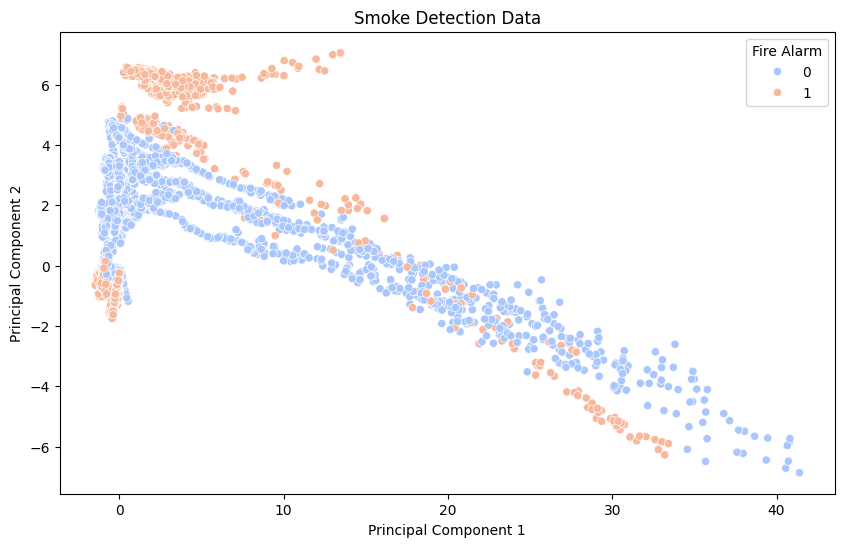

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Fire Alarm'] = y_train.values

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Fire Alarm', data=df_pca, palette='coolwarm')
plt.title('Smoke Detection Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Fire Alarm')
plt.show()

# Khởi tạo mô hình Logistic Regression

In [ ]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

y_pred_initial = log_reg.predict(X_test)

accuracy_initial = accuracy_score(y_test, y_pred_initial)
print(f"Initial Accuracy: {accuracy_initial}")

Initial Accuracy: 0.9892224173718666


***Bước đầu tiên cho thấy mô hình Logistic Regression với cấu hình mặc định đã đạt được độ chính xác tương đối cao là 0.9892***

# Practice 1: Thử nghiệm các giá trị của tham số C

In [ ]:
best_accuracy = 0
best_C = 1
C_values = [0.01, 0.1, 1, 10, 100]

for C in C_values:
    log_reg = LogisticRegression(C=C, max_iter=10000, penalty='l2', solver='liblinear')
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_C = C
    print(f"C: {C}, Accuracy: {accuracy}")
print(f"Best C: {best_C}, Best Accuracy: {best_accuracy}")



C: 0.01, Accuracy: 0.9624780456650167
C: 0.1, Accuracy: 0.9767683218904678
C: 1, Accuracy: 0.988743413699505
C: 10, Accuracy: 0.995050295385598
C: 100, Accuracy: 0.997125977965831
Best C: 100, Best Accuracy: 0.997125977965831


***Kết quả cho thấy giá trị tối ưu của tham số C là 100, và độ chính xác của mô hình đã cải thiện đáng kể từ 0.9892 lên 0.9971. Điều này cho thấy việc điều chỉnh tham số C có thể tối ưu hóa mô hình Logistic Regression rất hiệu quả.***

# Practice 2: Sử dụng regularization L1 với solver 'saga'

In [ ]:
log_reg_l1 = LogisticRegression(C=best_C, max_iter=10000, penalty='l1', solver='saga')
log_reg_l1.fit(X_train, y_train)
y_pred_l1 = log_reg_l1.predict(X_test)
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
print(f"Accuracy with L1 regularization: {accuracy_l1}")


Accuracy with L1 regularization: 0.9948107935494173


***Sử dụng regularization L1 với solver 'saga', độ chính xác của mô hình giảm nhẹ xuống còn 0.9948. Điều này có thể là do L1 regularization làm mô hình bị giảm bớt một số trọng số, giúp mô hình bớt phức tạp nhưng đồng thời cũng làm giảm nhẹ độ chính xác.***

# Practice 3: Thử nghiệm với tập dữ liệu chuẩn hóa và không chuẩn hóa

In [ ]:


X_train_no_scale, X_test_no_scale, y_train_no_scale, y_test_no_scale = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

log_reg_no_scale = LogisticRegression(C=best_C, max_iter=10000, penalty='l2', solver='liblinear')
log_reg_no_scale.fit(X_train_no_scale, y_train_no_scale)
y_pred_no_scale = log_reg_no_scale.predict(X_test_no_scale)
accuracy_no_scale = accuracy_score(y_test_no_scale, y_pred_no_scale)
print(f"Accuracy with no scaling: {accuracy_no_scale}")




Accuracy with no scaling: 0.7145936452179467


***Khi không chuẩn hóa dữ liệu, độ chính xác của mô hình giảm đáng kể xuống còn 0.7146. Điều này cho thấy việc chuẩn hóa dữ liệu là rất quan trọng trong việc cải thiện độ chính xác của mô hình Logistic Regression, đặc biệt là khi các đặc trưng có sự khác biệt lớn về đơn vị đo lường.***

# Huấn luyện mô hình Logistic Regression với tham số C tốt nhất và dữ liệu chuẩn hóa

In [ ]:
log_reg_best = LogisticRegression(C=best_C, max_iter=10000, penalty='l2', solver='liblinear')
log_reg_best.fit(X_train, y_train)
y_pred_best = log_reg_best.predict(X_test)


accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {accuracy_best}")

Best Model Accuracy: 0.997125977965831


# Biểu đồ so sánh độ chính xác trước và sau khi tối ưu

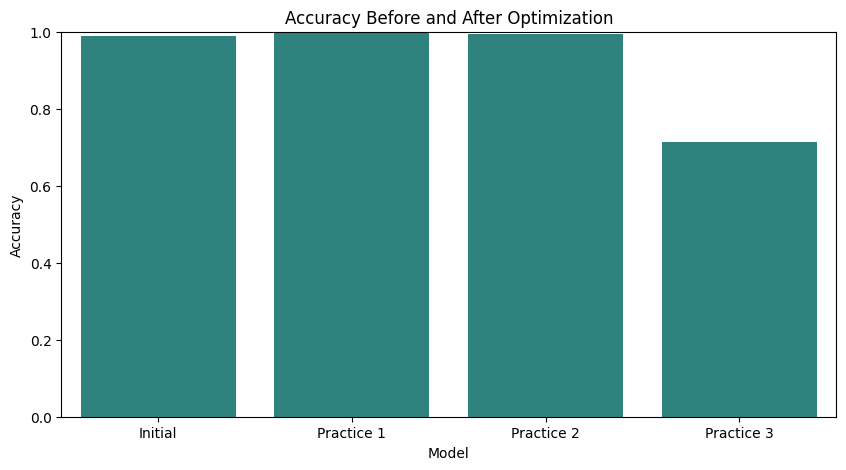

In [ ]:
accuracies = [accuracy_initial, accuracy_best, accuracy_l1, accuracy_no_scale]
labels = ['Initial', 'Practice 1', 'Practice 2', 'Practice 3']

plt.figure(figsize=(10, 5))
sns.barplot(x=labels, y=accuracies, palette='viridis',legend = False,hue=1)
plt.ylim(0, 1)
plt.title('Accuracy Before and After Optimization')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()


# Báo cáo

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3575
           1       1.00      1.00      1.00      8951

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



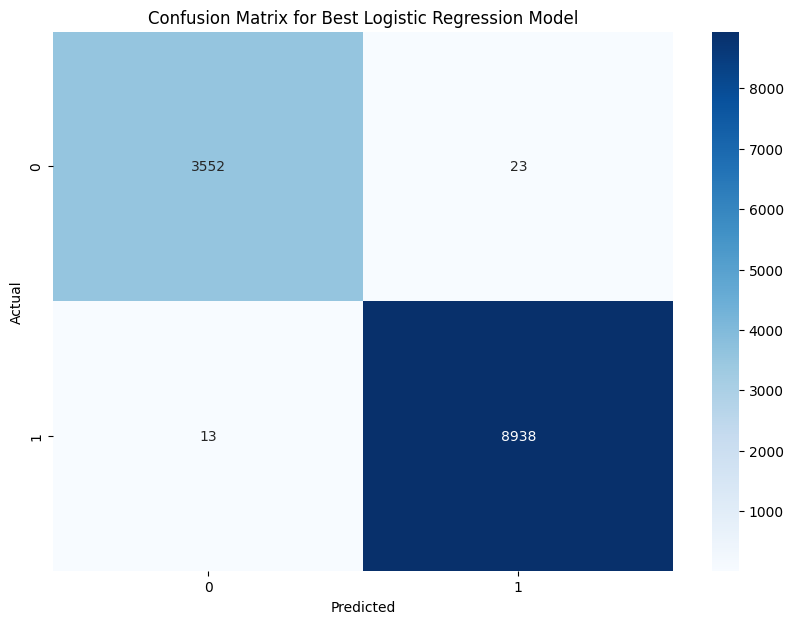

In [ ]:
print("Classification Report for Best Model:")
print(classification_report(y_test, y_pred_best))

conf_matrix_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_best, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Best Logistic Regression Model")
plt.show()

Đánh giá:

- Độ chính xác và độ nhạy cao: Cả hai chỉ số này đều rất cao cho cả hai lớp, cho thấy mô hình hoạt động xuất sắc với rất ít lỗi phân loại.

- False Positives và số False Negatives thấp cho thấy mô hình chính xác và tin cậy.

- Độ chính xác tổng thể: Độ chính xác 1.00 cho thấy mô hình phân loại hoàn hảo trên tập kiểm tra.

# Demo

In [ ]:
new_data = {
    'UTC': [1654736886],
    'Temperature[C]': [4.704],
    'Humidity[%]': [53.38],
    'TVOC[ppb]': [327],
    'eCO2[ppm]': [400],
    'Raw H2': [13113],
    'Raw Ethanol': [19883],
    'Pressure[hPa]': [939.69],
    'PM1.0': [1.46],
    'PM2.5': [1.51],
    'NC0.5': [10.04],
    'NC1.0': [1.565],
    'NC2.5': [0.035],
    'CNT': [3555]
}

new_data_df = pd.DataFrame(new_data)
new_data_df = new_data_df[X.columns]

new_data_scaled = scaler.transform(new_data_df)


new_pred = log_reg_best.predict(new_data_scaled)
new_pred_proba = log_reg_best.predict_proba(new_data_scaled)

print(f"New Data Prediction: {new_pred[0]}")
print(f"New Data Prediction Probability: {new_pred_proba[0]}")

New Data Prediction: 1
New Data Prediction Probability: [0.14139522 0.85860478]
